<a href="https://colab.research.google.com/github/sud0x00/SharadaProject-Classifier_Model/blob/main/InferenceCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Inference

In [ ]:
!pip install gdown
import gdown

file_ids = [
    "1IbN5ee4nNY0t80uhJU3n5Jl--VXZl6vQ",  # File 1 -> https://drive.google.com/file/d/1IbN5ee4nNY0t80uhJU3n5Jl--VXZl6vQ/view?usp=drive_link
    "1VaYm6hp4YiJeyIxAGp1A_mFfocip4wzF",  # File 2 -> https://drive.google.com/file/d/1VaYm6hp4YiJeyIxAGp1A_mFfocip4wzF/view?usp=drive_link
    "1Pg59eWrJDsAtm8XCAJeySPvN6MCj7bL4"   # File 3 -> https://drive.google.com/file/d/1Pg59eWrJDsAtm8XCAJeySPvN6MCj7bL4/view?usp=sharing
]

for file_id in file_ids:
    download_url = f"https://drive.google.com/uc?id={file_id}"
    gdown.download(download_url)


Downloading...
From: https://drive.google.com/uc?id=1IbN5ee4nNY0t80uhJU3n5Jl--VXZl6vQ
To: /content/resnet50_e50_augmented_L182.h5
100%|██████████| 98.2M/98.2M [00:04<00:00, 24.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VaYm6hp4YiJeyIxAGp1A_mFfocip4wzF
To: /content/dict1.json
100%|██████████| 2.34k/2.34k [00:00<00:00, 5.68MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Pg59eWrJDsAtm8XCAJeySPvN6MCj7bL4
To: /content/dict2.json
100%|██████████| 11.2k/11.2k [00:00<00:00, 6.78MB/s]


In [ ]:
!git clone https://github.com/SharadaNLP/SharadaProjectOld

Cloning into 'SharadaProjectOld'...
remote: Enumerating objects: 61, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 61 (delta 21), reused 61 (delta 21), pack-reused 0
Receiving objects: 100% (61/61), 75.36 KiB | 9.42 MiB/s, done.
Resolving deltas: 100% (21/21), done.


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/resnet50_e50_augmented_L182.h5')

# Load the json dicts
import json
with open('/content/dict1.json', 'r') as f:
  idx_to_dict = json.load(f)

with open('/content/dict2.json', 'r') as f:
  dict_to_char = json.load(f)


d1_swap = {v: k for k, v in idx_to_dict.items()}
d2_swap = {v: k for k, v in dict_to_char.items()}


1/1 [==============================] - 2s 2s/step


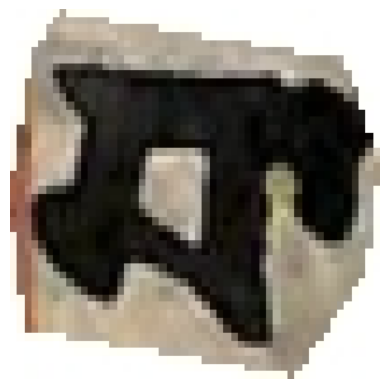

File: चा.jpg
Predicted Character: Wrong Character

1/1 [==============================] - 0s 155ms/step


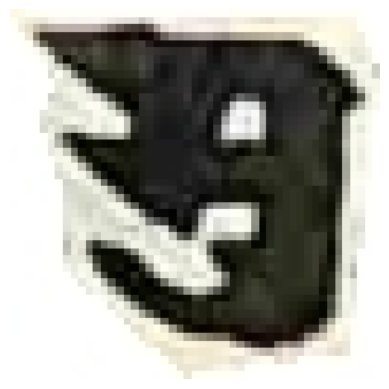

File: शु.jpg
Predicted Character: त

1/1 [==============================] - 0s 165ms/step


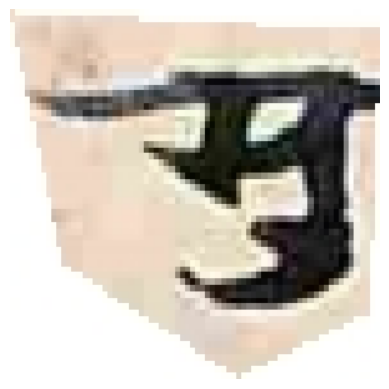

File: आ.jpg
Predicted Character: त

1/1 [==============================] - 0s 160ms/step


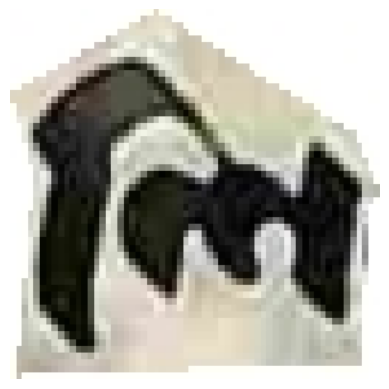

File: णि.jpg
Predicted Character: Wrong Character

1/1 [==============================] - 0s 166ms/step


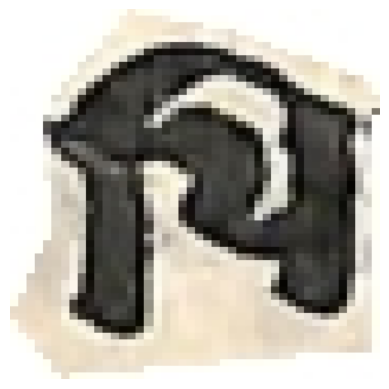

File: पि.jpg
Predicted Character: पू

1/1 [==============================] - 0s 180ms/step


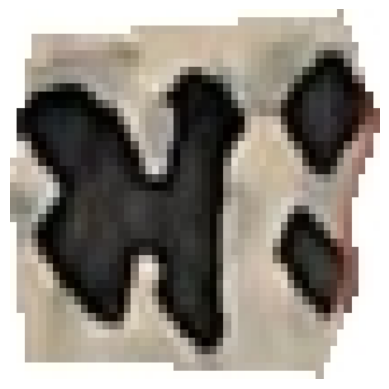

File: मः.jpg
Predicted Character: पू



In [ ]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Path to the folder containing images
image_folder = '/content/SharadaProjectOld/samples/'

# Loop through all images in the folder
for image_filename in os.listdir(image_folder):
    if image_filename.endswith('.jpg'):
        image_path = os.path.join(image_folder, image_filename)

        # Load and preprocess the image
        img = image.load_img(image_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = tf.keras.applications.resnet50.preprocess_input(img_array)

        # Make prediction
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)
        # predicted_class_name = class_mapping[predicted_label]

        # Convert idx to dict and dict to character
        try:
          predicted_dict = d1_swap[predicted_label]
          predicted_char = str(d2_swap[predicted_dict])
        except KeyError:
          predicted_char = "Wrong Character"

        # # Display the image along with the predicted class
        # img = Image.open(image_path)
        # plt.imshow(img)
        # # plt.title(f"Predicted: {predicted_class_name}")
        # plt.title(f"Predicted: {predicted_char}")
        # plt.axis('off')
        # plt.show()

        # Display the character image using Matplotlib
        plt.imshow(img)
        # plt.title(f"Predicted Character: {predicted_char}")
        plt.axis('off')
        plt.show()

        # Display the filename and predicted character
        print("File:", image_filename)
        print("Predicted Character:", predicted_char)
        # print("Predictions:", prediction[0])  # Printing prediction probabilities sideways
        print()